In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

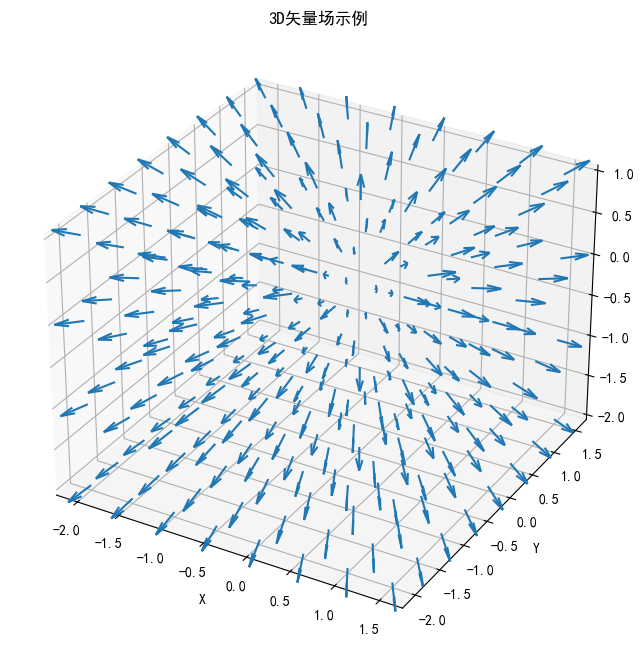

In [3]:
# 创建一个三维图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 生成网格数据
x, y, z = np.meshgrid(np.arange(-2, 2, 0.5),
                      np.arange(-2, 2, 0.5),
                      np.arange(-2, 2, 1))

# 定义矢量场 - 这里使用一个简单的径向场
u = x
v = y
w = z

# 绘制3D矢量场
quiver = ax.quiver(x, y, z,                 # 箭头起点坐标
                   u, v, w,                 # 箭头方向分量
                   length=0.3,              # 箭头长度
                   arrow_length_ratio=0.5,  # 箭头头部长度的比例（占总长度的50%）
                   normalize=True           # 标准化箭头长度（统一长度，只显示方向）
                  )

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D矢量场示例')

plt.show()

# 2、使用示例：

### 示例 1：箭头旋转的基点

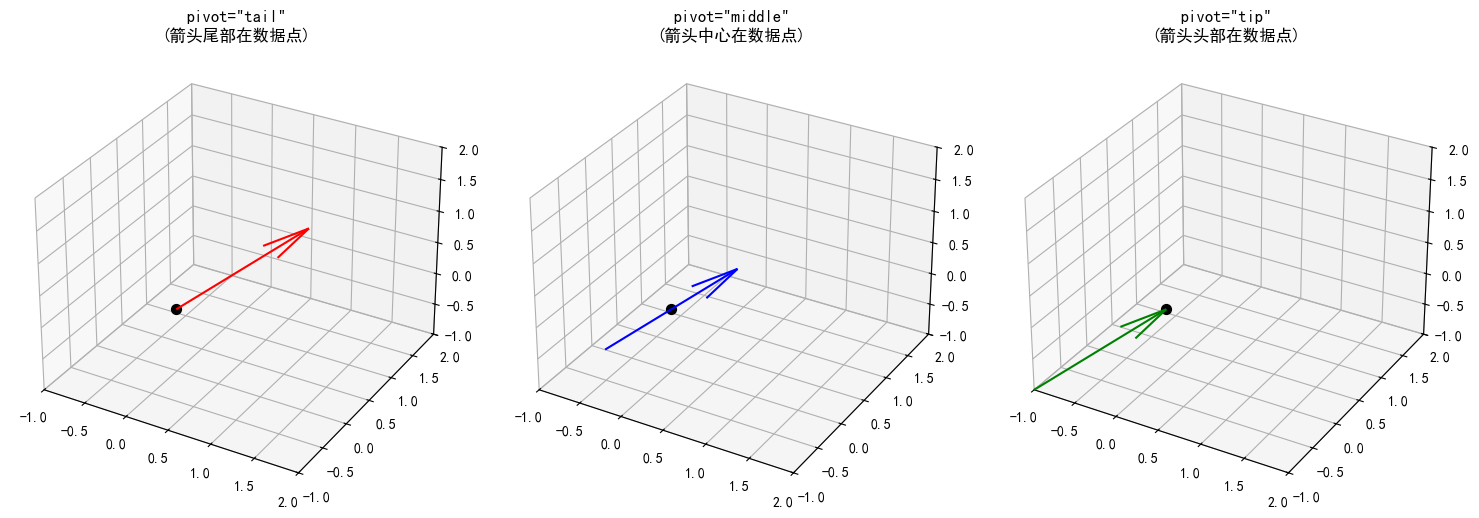

In [4]:
# 创建简单的数据
x = np.array([0])
y = np.array([0])
z = np.array([0])
u = np.array([1])
v = np.array([1])
w = np.array([1])

fig = plt.figure(figsize=(15, 5))

# pivot='tail'
ax1 = fig.add_subplot(131, projection='3d')
ax1.quiver(x, y, z, u, v, w, pivot='tail', length=1.0, color='red')
ax1.scatter(x, y, z, color='black', s=50)  # 显示数据点位置
ax1.set_title('pivot="tail"\n(箭头尾部在数据点)')
ax1.set_xlim(-1, 2), ax1.set_ylim(-1, 2), ax1.set_zlim(-1, 2)

# pivot='middle'
ax2 = fig.add_subplot(132, projection='3d')
ax2.quiver(x, y, z, u, v, w, pivot='middle', length=1.0, color='blue')
ax2.scatter(x, y, z, color='black', s=50)
ax2.set_title('pivot="middle"\n(箭头中心在数据点)')
ax2.set_xlim(-1, 2), ax2.set_ylim(-1, 2), ax2.set_zlim(-1, 2)

# pivot='tip'
ax3 = fig.add_subplot(133, projection='3d')
ax3.quiver(x, y, z, u, v, w, pivot='tip', length=1.0, color='green')
ax3.scatter(x, y, z, color='black', s=50)
ax3.set_title('pivot="tip"\n(箭头头部在数据点)')
ax3.set_xlim(-1, 2), ax3.set_ylim(-1, 2), ax3.set_zlim(-1, 2)

plt.tight_layout()
plt.show()

### 示例 2：颜色映射

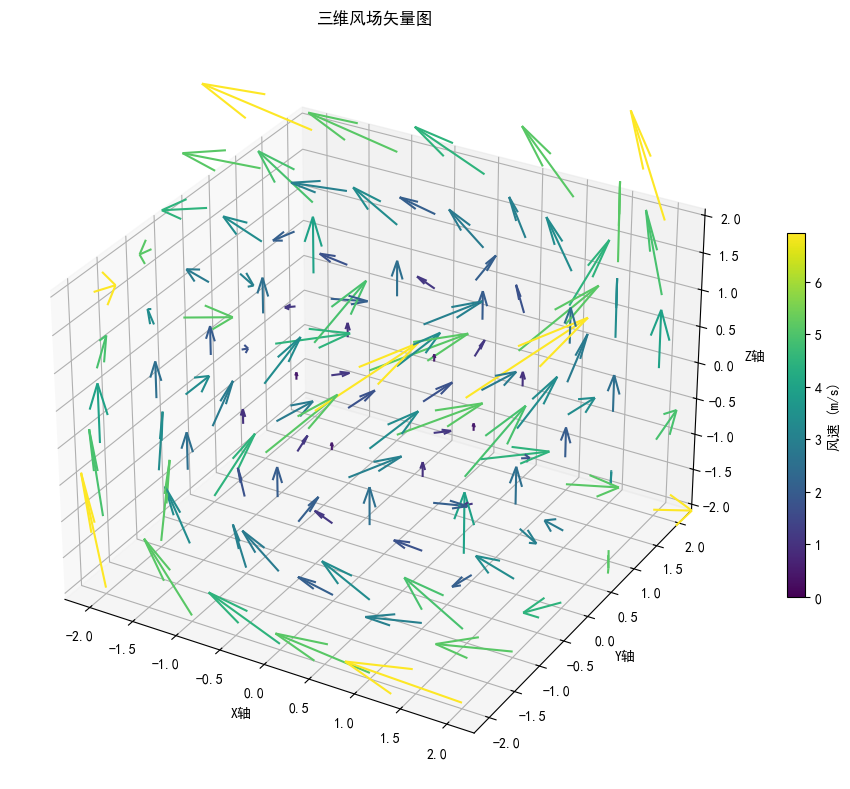

In [5]:
# 生成网格点
x, y, z = np.meshgrid(np.linspace(-2, 2, 5), np.linspace(-2, 2, 5), np.linspace(-2, 2, 5))

# 定义矢量场（环形风场+垂直上升流）
U = -y * z
V = x * z
W = 0.5 * (x**2 + y**2)

# 计算矢量模长用于颜色映射
magnitude = np.sqrt(U**2 + V**2 + W**2)

# 创建3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制带颜色映射的矢量场
quiver = ax.quiver(
    x, y, z, U, V, W,
    length=0.2,
    arrow_length_ratio=0.5,
    array=magnitude.flatten(),
    cmap='viridis',
    normalize=False
)

# 添加颜色条与标签
plt.colorbar(quiver, ax=ax,shrink=0.5, aspect=20, label='风速 (m/s)')
ax.set_xlabel('X轴'), ax.set_ylabel('Y轴'), ax.set_zlabel('Z轴')
ax.set_title('三维风场矢量图', pad=20)

plt.tight_layout()
plt.show()